In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [37]:
diabetes = pd.read_csv('C:\\Users\\USER\\Downloads//diabetes.csv')

In [38]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
diabetes.shape
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [42]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [44]:
correlation = diabetes.corr()

<Axes: >

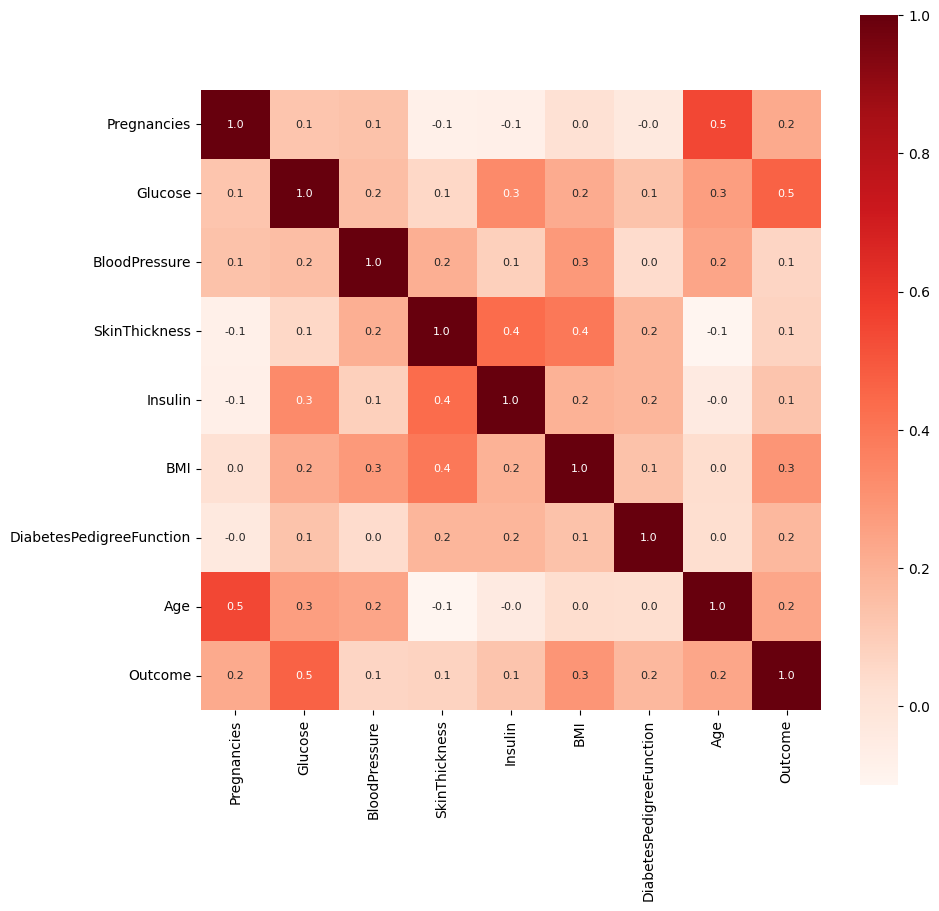

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [46]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [47]:
X = diabetes.iloc[:,0:-1]
y = diabetes.iloc[:,-1]

In [48]:
X.shape, y.shape

((768, 8), (768,))

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [50]:
param_dist = {'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1,1] }
sv = svm.SVC(kernel ='linear')
random_search = RandomizedSearchCV(estimator = sv, cv =3 ,param_distributions= param_dist, n_jobs=-1 , scoring ='accuracy', verbose =1)

In [51]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear'), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1]},
                   scoring='accuracy', verbose=1)

In [52]:
print(random_search.best_params_, random_search.best_score_, random_search.best_estimator_)

{'gamma': 0.001, 'C': 1} 0.7670492587278814 SVC(C=1, gamma=0.001, kernel='linear')


In [53]:
X_train_pred=random_search.best_estimator_.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, y_train)

In [54]:
print(training_accuracy)

0.7719869706840391


In [55]:
X_test_pred = X_train_pred=random_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, y_test)

In [56]:
print(test_accuracy)

0.7597402597402597


Testing The Model

In [57]:
input_data = (7,170,65,23,165,22.7,0.423,62)
input_to_array= np.asarray(input_data)
input_array_reshaped = input_to_array.reshape(1,-1)

prediction = random_search.predict(input_array_reshaped)

if (prediction[0] ==0):
    print('You are not Diabetic')
else:
    print('You are Diabetic')


You are Diabetic


Saving the Model

In [58]:
import pickle
with open('DiabetesModel.pkl', 'wb') as f:
    pickle.dump(random_search,f)
